In [49]:
import pandas as pd
from preprocess import load_data_year
import seaborn as sns
import matplotlib.pyplot as plt
from analysis import aggregate_by_country
from pathlib import Path

In [50]:
raw_path = Path('data/raw_year')
table_path = Path('latex_tables')
aggregated_data_path = Path('data/aggregated')

In [51]:
year = 1982
raw_data_path = raw_path / f'raw_{year}.csv'

In [52]:
# Read the raw data
raw_data = pd.read_csv(raw_data_path)
raw_data.head()

,Date,Source,Target,CAMEOCode,NumEvents,NumArts,Goldstein
0,1992-01-01,AFG,AFGGOV,190,1,2,-10.0
1,1992-01-01,AFG,AFGMIL,46,1,2,7.0
2,1992-01-01,AFGCVL,AFG,192,1,2,-9.5
3,1992-01-01,AFGCVL,COP,173,1,2,-5.0
4,1992-01-01,AFGELI,MIL,46,2,5,7.0


In [53]:
# Read aggregated data
aggregated_data = pd.read_csv(aggregated_data_path / f'aggregated_all_{year}.csv')
aggregated_data.head()

,Source code,Target code,Goldstein_sum,Goldstein_mean,Goldstein_std,Goldstein_count
0,ABW,BRA,25.2,2.800000,0.000000,9
1,AFG,AFG,4162.4,0.544318,5.410942,7647
2,AFG,AGO,22.5,2.500000,0.450000,9
3,AFG,ARE,35.6,2.373333,2.999397,15
4,AFG,AUS,96.0,5.333333,2.765332,18


In [54]:
print(table)

\begin{tabular}{llrrrr}
\toprule
Source code & Target code & Goldstein_sum & Goldstein_mean & Goldstein_std & Goldstein_count \\
\midrule
AFG & AFG & -3282.500000 & -1.494083 & 6.102119 & 2197 \\
AFG & AUT & -32.000000 & -4.000000 & 0.000000 & 8 \\
AFG & BGR & 461.900000 & 5.434118 & 2.642444 & 85 \\
AFG & BLR & 20.300000 & 1.450000 & 0.466987 & 14 \\
AFG & CAN & 22.000000 & 1.000000 & 0.000000 & 22 \\
\bottomrule
\end{tabular}


# Data analysis
In this section we will perform a general analysis on the data

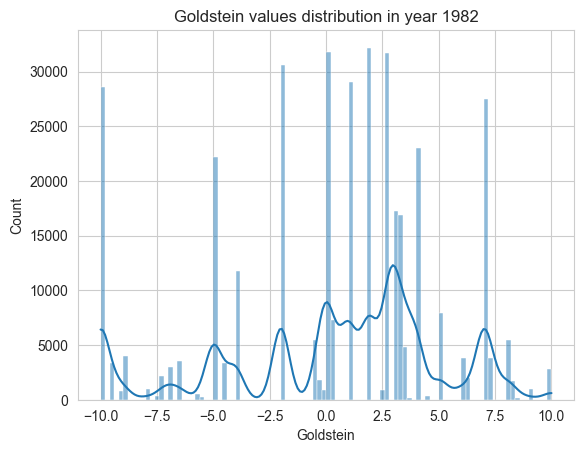

In [55]:
sources = ['USA', 'DEU', 'FRA', 'GBR', 'JPN', 'CHN', 'IND', 'BRA', 'RUS', 'IRN']
# Analyze the distribution of the goldstein values
#sns.boxplot(data=data, x='Goldstein')
# Plot goldstein values distribution
sns.histplot(raw_data, x='Goldstein', bins=100, kde=True)
plt.title(f'Goldstein values distribution in year {year}');

<Figure size 1000x500 with 0 Axes>

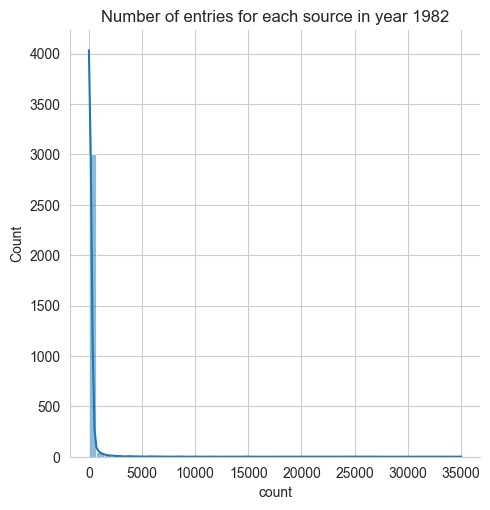

In [56]:
# Count the entries for each source
source_counts = raw_data['Source'].value_counts()
# Plot the source counts
plt.figure(figsize=(10, 5))
sns.displot(source_counts, bins=50, kde=True)
plt.title(f'Number of entries for each source in year {year}');

## Analysis on aggregated data

In [57]:
def aggregated_barplot(data, x, y, k):
    #data_aggregated = aggregate_by_country(data, x)
    k = data.sort_values(y, ascending=False).head(k)
    worst_k = data.sort_values(y, ascending=True).head(k)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.barplot(data=top_k, x=x, y=y)
    # Verical rotation of the x labels
    plt.xticks(rotation=90)
    plt.title(f'Top {k} {x} in year {year}')
    plt.subplot(1, 2, 2)
    sns.barplot(data=worst_k, x=x, y=y)
    plt.xticks(rotation=90)
    plt.title(f'Worst {k} {x} in year {year}');

In [58]:
# k = 10
# self_include = True
# data_aggregated_source = aggregate_by_country(raw_data, 'Source', self_include)
# data_aggregated_target = aggregate_by_country(raw_data, 'Target', self_include)
# aggregated_barplot(data_aggregated_source, 'Source', 'Goldstein', k)
# aggregated_barplot(data_aggregated_target, 'Target', 'Goldstein', k)

In [59]:
# data_aggregated_source_target = aggregate_by_country(raw_data, ['Source', 'Target'], self_include)
# # Make pairs aggregation
# data_aggregated_source_target['Source-Target'] = data_aggregated_source_target['Source code'] + '-' + data_aggregated_source_target['Target code']
# aggregated_barplot(data_aggregated_source_target, 'Source-Target', 'Goldstein', k)

## Centrality analysis

In [60]:
from analysis import compute_centrality, compute_page_rank
from graph import load_graph_for
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
years = [year for year in range(1979, 2015)]
centrality_measure = 'degree'
map_type = 'all'
nations = {}
for year in years:
    graph = load_graph_for(year, map_type=map_type)
    centrality, _  = compute_centrality(graph, centrality_measure)
    for node, value in centrality.items():
        nations.setdefault(node, {})
        nations[node][year] = value 

In [62]:
# Create a dataframe with the centralities
centralities = pd.DataFrame(nations).T
centralities

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
EGY,0.180180,0.153153,0.166667,0.207207,0.159292,0.163793,0.162393,0.165354,0.205128,0.198413,...,0.151316,0.165605,0.163636,0.169591,0.173410,0.188235,0.335294,0.227273,0.209581,0.173333
USA,0.495495,0.531532,0.648148,0.666667,0.699115,0.681034,0.666667,0.637795,0.649573,0.579365,...,0.743421,0.751592,0.812121,0.812865,0.843931,0.870588,0.900000,0.903409,0.898204,0.793333
CZE,0.045045,0.036036,0.027778,0.018018,0.026549,0.034483,0.025641,0.007874,0.025641,0.015873,...,0.072368,0.025478,0.078788,0.052632,0.132948,0.052941,0.058824,0.051136,0.023952,0.053333
SVK,0.018018,0.036036,0.027778,0.009009,0.008850,0.025862,0.017094,0.007874,0.017094,0.015873,...,0.052632,0.019108,0.012121,0.017544,0.046243,0.017647,0.017647,0.028409,0.017964,0.013333
PAN,0.027027,0.027027,0.009259,0.009009,0.079646,0.060345,0.068376,0.031496,0.042735,0.047619,...,0.000000,0.006369,0.012121,0.005848,0.011561,0.017647,0.017647,0.022727,0.017964,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.005882,0.011765,0.011364,NaN,NaN
MHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.005882,NaN,NaN,0.020000
KIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011364,NaN,NaN
COK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005682,NaN,NaN


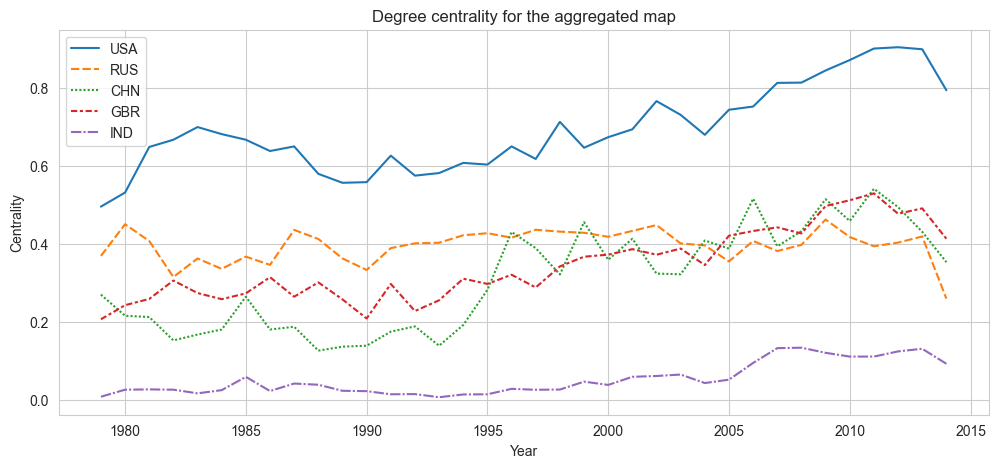

In [63]:
states = ['USA', 'RUS', 'CHN', 'GBR', 'IND'],#['USA', 'DEU', 'FRA', 'GBR', 'JPN', 'CHN', 'IND', 'BRA', 'RUS', 'IRN']
plt.figure(figsize=(12, 5))
sns.lineplot(data=centralities.loc[states].T, dashes=True)
plt.xlabel('Year')
plt.ylabel('Centrality')
plt.title(f'{centrality_measure.capitalize()} centrality for the aggregated map')
plt.show()

In [64]:
def print_centralities(year: int, nations: list):
    for centrality_measure in ['degree', 'closeness', 'betweenness', 'eigenvector']:
        graph = load_graph_for(year, map_type=map_type)
        
        print(f'Centrality measure: {centrality_measure}')
        centrality, _  = compute_centrality(graph, centrality_measure)
        print(f'Year: {year}')
        for nation in nations:
            print(f'{nation}: {centrality[nation]:.3f}')
        
     # compute page rank
    print(f'Page rank')
    page_rank, _ = compute_page_rank(graph)
    for nation in nations:
        print(f'{nation}: {page_rank[nation]:.3f}')   
        
print_centralities(1982, ['USA', 'RUS', 'CHN', 'GBR', 'IND'])

Centrality measure: degree
Year: 1982
USA: 0.667
RUS: 0.315
CHN: 0.153
GBR: 0.306
IND: 0.027
Centrality measure: closeness
Year: 1982
USA: 0.718
RUS: 0.526
CHN: 0.481
GBR: 0.534
IND: 0.427
Centrality measure: betweenness
Year: 1982
USA: 0.654
RUS: 0.069
CHN: 0.016
GBR: 0.043
IND: 0.000
Centrality measure: eigenvector
Year: 1982
USA: 0.170
RUS: 0.050
CHN: 0.040
GBR: 0.108
IND: 0.004
Page rank
USA: 0.063
RUS: 0.026
CHN: 0.022
GBR: 0.036
IND: 0.004


In [65]:
# Create a two column dataframe with the centralities from nations
df = pd.DataFrame(nations)
df = df.reset_index()
df = pd.melt(df, id_vars='index', var_name='state', value_name='centrality')
df.rename(columns={'index': 'year'}, inplace=True)
df

,year,state,centrality
0,1979,EGY,0.180180
1,1980,EGY,0.153153
2,1981,EGY,0.166667
3,1982,EGY,0.207207
4,1983,EGY,0.159292
...,...,...,...
6943,2010,DMA,NaN
6944,2011,DMA,NaN
6945,2012,DMA,0.017045
6946,2013,DMA,NaN


In [66]:
states = ['USA', 'RUS', 'CHN', 'GBR', 'IND']
# Take the countries that we want to analyze
top = df[df['state'].isin(states)]
# Every 5 years
top = top[top['year'] % 3 == 0]

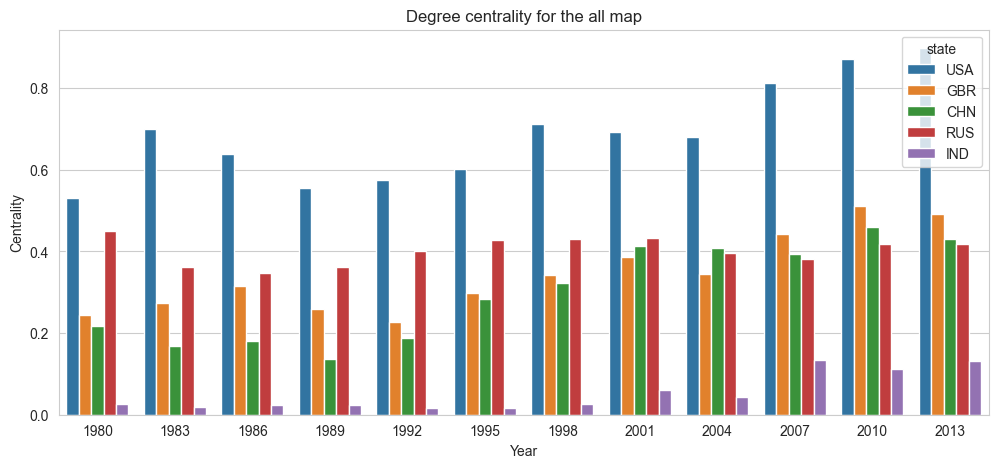

In [67]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top, x='year', y='centrality', hue='state', orient='v')
plt.xlabel('Year')
plt.ylabel('Centrality')
plt.title(f'{centrality_measure.capitalize()} centrality for the {map_type} map')
plt.show()

In [68]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Friendship and enmity analysis

In [69]:
map_type = 'all'
pairs = {}
for year in years:
    graph = load_graph_for(year, map_type=map_type)
    for edge in graph.edges.keys():
        print(edge)
        source, target = edge
        
        if source > target:
            source, target = target, source
        
        pair_name = f'{source}-{target}'
        pairs.setdefault(pair_name, {})
        pairs[pair_name][year] = - graph.edges[edge]["weight"]  if map_type == 'only_negative' else graph.edges[edge]["weight"]
        

('EGY', 'USA')
('EGY', 'IRQ')
('EGY', 'ISR')
('EGY', 'FRA')
('EGY', 'SOM')
('EGY', 'GBR')
('EGY', 'PSE')
('EGY', 'LBY')
('EGY', 'JPN')
('EGY', 'OMN')
('EGY', 'RUS')
('EGY', 'CHN')
('EGY', 'JOR')
('EGY', 'IRN')
('EGY', 'SAU')
('EGY', 'KWT')
('EGY', 'LBN')
('EGY', 'MAR')
('EGY', 'SYR')
('EGY', 'SDN')
('USA', 'PAN')
('USA', 'TUR')
('USA', 'IRQ')
('USA', 'KHM')
('USA', 'JOR')
('USA', 'SAU')
('USA', 'IRL')
('USA', 'COL')
('USA', 'THA')
('USA', 'JPN')
('USA', 'ITA')
('USA', 'NIC')
('USA', 'ZWE')
('USA', 'SYR')
('USA', 'VEN')
('USA', 'CUB')
('USA', 'VNM')
('USA', 'CHE')
('USA', 'MEX')
('USA', 'AFG')
('USA', 'ZAF')
('USA', 'AUT')
('USA', 'PRT')
('USA', 'LBY')
('USA', 'PER')
('USA', 'ISR')
('USA', 'CHL')
('USA', 'GBR')
('USA', 'GUY')
('USA', 'LBN')
('USA', 'MAR')
('USA', 'PHL')
('USA', 'RUS')
('USA', 'HUN')
('USA', 'KWT')
('USA', 'AUS')
('USA', 'FRA')
('USA', 'SLV')
('USA', 'BEL')
('USA', 'POL')
('USA', 'PRK')
('USA', 'ESP')
('USA', 'UGA')
('USA', 'CAN')
('USA', 'KOR')
('USA', 'PAK')
('USA', 'P

In [70]:
## Create a dataframe with the centralities
df_pair = pd.DataFrame(pairs).T
# Fill nan values with 0
df_pair.fillna(0, inplace=True)

# Create a two column dataframe with the centralities from nations
df_pair_noindex = pd.DataFrame(pairs)
df_pair_noindex = df_pair_noindex.reset_index()
df_pair_noindex = pd.melt(df_pair_noindex, id_vars='index', var_name='pair', value_name='weight')
df_pair_noindex.rename(columns={'index': 'year'}, inplace=True)
df_pair_noindex.fillna(0, inplace=True)
df_pair_noindex

,year,pair,weight
0,1979,EGY-USA,0.028756
1,1980,EGY-USA,0.027139
2,1981,EGY-USA,0.024354
3,1982,EGY-USA,0.015331
4,1983,EGY-USA,0.010537
...,...,...,...
103099,2010,MHL-SLV,0.000000
103100,2011,MHL-SLV,0.000000
103101,2012,MHL-SLV,0.000000
103102,2013,MHL-SLV,0.000000


In [71]:
df_pair

,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
EGY-USA,0.028756,0.027139,0.024354,0.015331,0.010537,0.004770,0.008529,0.003766,0.003010,0.006243,...,0.003818,0.002272,0.003022,0.002149,0.005878,0.004201,0.010436,0.005593,0.001713,0.001593
EGY-IRQ,-0.000113,0.000104,0.001264,0.002352,0.006149,0.002932,0.004051,0.002712,0.002836,0.004367,...,0.001715,0.001006,0.003400,0.001171,0.000809,0.000793,0.000088,0.000518,0.000053,0.000000
EGY-ISR,0.088551,0.053406,0.052477,0.050651,0.023631,0.023053,0.024148,0.027259,0.020766,0.014536,...,0.018368,0.004278,0.006422,0.008532,0.011267,0.005521,0.001006,0.005474,0.000177,-0.004922
EGY-FRA,0.002962,0.003145,0.008015,0.006655,0.001302,0.004742,0.003090,0.004358,0.002366,0.002068,...,0.001577,0.000994,0.000802,0.000936,0.001515,0.000042,0.001012,-0.000160,-0.000089,0.000209
EGY-SOM,0.000680,0.000000,0.000000,0.001095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000324,0.000656,0.000000,0.000072,0.000000,-0.001003,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOZ-RWA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.005075
LBY-NZL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.011995
MEX-TWN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MEX-MHL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000780


In [72]:
selected_pairs = ['AFG-USA', 'CHN-USA', 'GBR-USA', 'RUS-USA', 'CHN-RUS']
#    , 'USA-IND', 'RUS-CHN', 'RUS-GBR', 'RUS-IND', 'CHN-GBR', 'CHN-IND', 'ISR-PSE']
# Take the countries that we want to analyze
top = df_pair_noindex[df_pair_noindex['pair'].isin(selected_pairs)]
# Every 5 years
top = top[top['year'] % 4 == 0]

In [73]:
top

,year,pair,weight
1405,1980,AFG-USA,0.003707
1409,1984,AFG-USA,0.000397
1413,1988,AFG-USA,0.005721
1417,1992,AFG-USA,0.000944
1421,1996,AFG-USA,0.000654
1425,2000,AFG-USA,-0.000480
1429,2004,AFG-USA,-0.007303
1433,2008,AFG-USA,-0.008066
1437,2012,AFG-USA,-0.007955
1693,1980,GBR-USA,0.009387


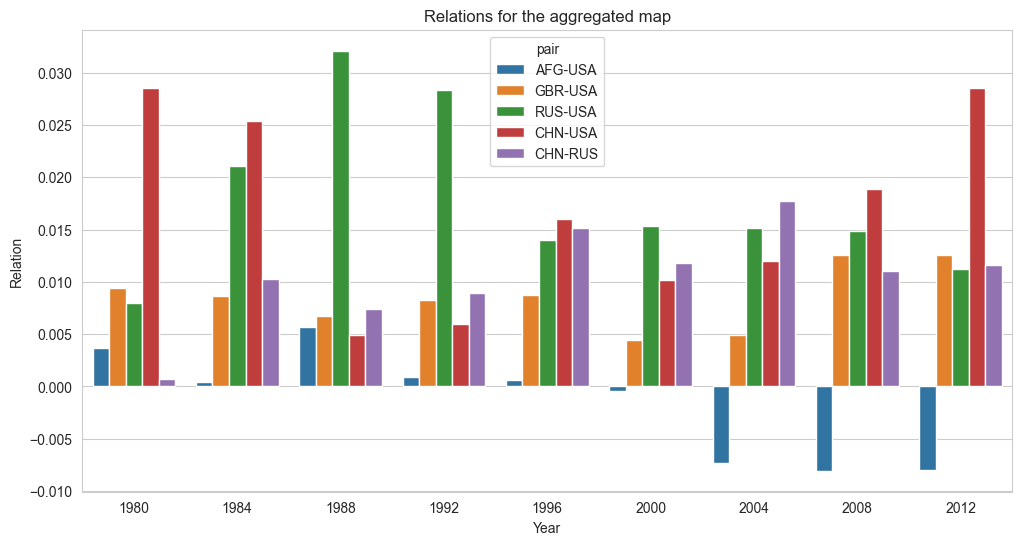

In [74]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top, x='year', y='weight', hue='pair', orient='v')
plt.ylabel('Relation')
plt.xlabel('Year')
plt.title(f'Relations for the aggregated map')
plt.show()

In [75]:
# Create source target pairs
selected_nations = ['USA', 'RUS', 'CHN', "ISR", "PSE", "AFG", "IRN", "IRQ"]
top_k = 10
selected_year = 1994
df_pair_noindex_st = df_pair_noindex.copy()
splitted = df_pair_noindex_st['pair'].str.split('-', n=1, expand=True)
df_pair_noindex_st['P1'] = splitted[0]
df_pair_noindex_st['P2'] = splitted[1]
df_pair_noindex_st = df_pair_noindex_st[df_pair_noindex_st['year'] == selected_year]
df_pair_noindex_st

,year,pair,weight,P1,P2
15,1994,EGY-USA,0.004900,EGY,USA
51,1994,EGY-IRQ,0.000863,EGY,IRQ
87,1994,EGY-ISR,0.026373,EGY,ISR
123,1994,EGY-FRA,0.002282,EGY,FRA
159,1994,EGY-SOM,-0.000377,EGY,SOM
...,...,...,...,...,...
102939,1994,MOZ-RWA,0.000000,MOZ,RWA
102975,1994,LBY-NZL,0.000000,LBY,NZL
103011,1994,MEX-TWN,0.000000,MEX,TWN
103047,1994,MEX-MHL,0.000000,MEX,MHL


In [76]:
import plotly.graph_objects as go

In [77]:
def plot_pairs(df, k, title='Worst'):
    # Plot the worst pairs
    fig = go.Figure()
    # Take the first element for each year
    
    for i in range(k):
        values = []
        pairs = []
        for year in df['year'].unique():
            data = df[df['year'] == year]
            data = data.reset_index()
            values.append(data['weight'].iloc[i])
            pairs.append(data['pair'].iloc[i])
        fig.add_trace(go.Bar(x=df['year'].unique(), y=values, text=pairs))
    # Hide the legend
    fig.update_layout(barmode='group', xaxis={'categoryorder':'array', 'categoryarray':years}, showlegend=False)
    # Set the title
    fig.update_layout(title=f'{title} {k} pairs for each year')
    # Set labels
    fig.update_xaxes(title_text='Year')
    fig.update_yaxes(title_text='Weight')
    fig.show()


In [ ]:
# For each year we select the worse 10 pairs
k = 3
# Take every 5 years
worst_pairs = df_pair_noindex[df_pair_noindex['year'] % 5 == 0]
worst_pairs = worst_pairs.groupby('year').apply(lambda x: x.nsmallest(k, 'weight'))
worst_pairs = worst_pairs.reset_index(drop=True)
# Sort by year
worst_pairs = worst_pairs.sort_values('year')
# Plot the worst pairs  
plot_pairs(worst_pairs, k, title='Worst')

# Top pairs
top_pairs = df_pair_noindex[df_pair_noindex['year'] % 5 == 0]
top_pairs = top_pairs.groupby('year').apply(lambda x: x.nlargest(k, 'weight'))
top_pairs = top_pairs.reset_index(drop=True)
# Sort by year
top_pairs = top_pairs.sort_values('year')
# Plot the worst pairs
plot_pairs(top_pairs, k, title='Top')
